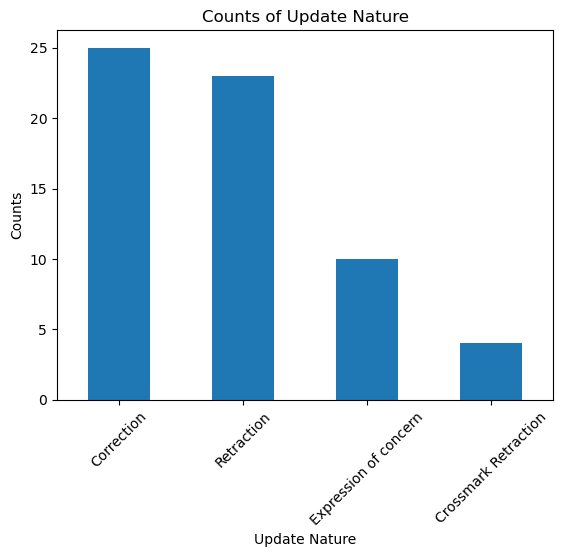

In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Function to fetch JSON data from URL and extract update-nature
def fetch_update_nature(url):
    response = requests.get(url)
    if response.status_code == 200:
        json_data = response.json()
        return json_data.get('message', {}).get('cr-labs-updates', [])
    else:
        return []

# Read CSV file
read_lines = 100  # Specify the number of lines to read
csv_filename = "retracted_works-2024-03-06T22-57-00.csv"
df = pd.read_csv(csv_filename, nrows=read_lines)

# Create lookup URLs and fetch update-nature
update_nature_list = []
for primary_location_landing_page_url in df['primary_location_landing_page_url']:
    url = f"https://api.labs.crossref.org/works/{primary_location_landing_page_url}?mailto=christian.hauschke@tib.eu"
    updates = fetch_update_nature(url)
    for update in updates:
        update_nature_list.append(update.get('update-nature'))

# Create DataFrame and plot bar chart if data is available
if update_nature_list:
    update_nature_df = pd.DataFrame(update_nature_list, columns=['update-nature'])
    update_nature_counts = update_nature_df['update-nature'].value_counts()

    # Plotting
    update_nature_counts.plot(kind='bar')
    plt.title('Counts of Update Nature')
    plt.xlabel('Update Nature')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No data available for plotting.")


In [4]:
print(df)

                                 id  \
0  https://openalex.org/W3001195213   
1  https://openalex.org/W1974047233   
2  https://openalex.org/W2118796952   
3  https://openalex.org/W3010930696   
4  https://openalex.org/W2166000498   
5  https://openalex.org/W1985563073   
6  https://openalex.org/W3120387768   
7  https://openalex.org/W2130011407   
8  https://openalex.org/W2105400883   
9  https://openalex.org/W2117847125   

                                        display_name publication_date  \
0  Detection of 2019 novel coronavirus (2019-nCoV...       2020-01-23   
1  DNA methylation age of human tissues and cell ...       2013-01-01   
2  Chimeric Antigen Receptor T Cells for Sustaine...       2014-10-16   
3  Hydroxychloroquine and azithromycin as a treat...       2020-07-01   
4  Primary Prevention of Cardiovascular Disease w...       2013-04-04   
5  <i>miR-15</i> and <i>miR-16</i> induce apoptos...       2005-09-15   
6  RETRACTED: 6-month consequences of COVID-19 in...       